# ▶️ CUDA setup

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
!nvidia-smi
!lscpu

Thu Dec  7 13:58:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## [GPU Compute Capability](https://developer.nvidia.com/cuda-gpus)

## NVCC Plugin for Jupyter notebook

*Usage*:


*   Load Extension `%load_ext nvcc_plugin`
*   Mark a cell to be treated as cuda cell
`%%cuda --name example.cu --compile false`

**NOTE**: The cell must contain either code or comments to be run successfully. It accepts 2 arguments. `-n | --name` - which is the name of either CUDA source or Header. The name parameter must have extension `.cu` or `.h`. Second argument -c | --compile; default value is false. The argument is a flag to specify if the cell will be compiled and run right away or not. It might be usefull if you're playing in the main function

*  We are ready to run CUDA C/C++ code right in your Notebook. For this we need explicitly say to the interpreter, that we want to use the extension by adding `%%cu` at the beginning of each cell with CUDA code.




In [ ]:
!pip install git+https://github.com/andreinechaev/nvcc4jupyter.git

  Cloning https://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-mif30fy1
  Running command git clone --filter=blob:none --quiet https://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-mif30fy1
  Resolved https://github.com/andreinechaev/nvcc4jupyter.git to commit 0a71d56e5dce3ff1f0dd2c47c29367629262f527
  Preparing metadata (setup.py) ... done
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-py3-none-any.whl size=4293 sha256=ed1948043ac71653d2696d925ed8bad1ab9c34a25343f2d168921fca5fdb00b5
  Stored in directory: /tmp/pip-ephem-wheel-cache-7cuguaou/wheels/a8/b9/18/23f8ef71ceb0f63297dd1903aedd067e6243a68ea756d6feea
Successfully built NVCCPlugin


In [ ]:
%load_ext nvcc_plugin

created output directory at /content/src
Out bin /content/result.out


Clone GPUcomputing site on github...

In [ ]:
!git clone https://github.com/tankado55/gpu-graph-coloring.git

Cloning into 'gpu-graph-coloring'...
remote: Enumerating objects: 447, done.
remote: Counting objects: 100% (447/447), done.
remote: Compressing objects: 100% (285/285), done.
remote: Total 447 (delta 279), reused 313 (delta 148), pack-reused 0
Receiving objects: 100% (447/447), 731.34 KiB | 10.45 MiB/s, done.
Resolving deltas: 100% (279/279), done.


In [ ]:
# plugin for cpp sintax highlighting

!wget -O cpp_plugin.py https://gist.github.com/akshaykhadse/7acc91dd41f52944c6150754e5530c4b/raw/cpp_plugin.py
%load_ext cpp_plugin

--2023-12-07 13:58:52--  https://gist.github.com/akshaykhadse/7acc91dd41f52944c6150754e5530c4b/raw/cpp_plugin.py
Resolving gist.github.com (gist.github.com)... 20.205.243.166
Connecting to gist.github.com (gist.github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gist.githubusercontent.com/akshaykhadse/7acc91dd41f52944c6150754e5530c4b/raw/cpp_plugin.py [following]
--2023-12-07 13:58:52--  https://gist.githubusercontent.com/akshaykhadse/7acc91dd41f52944c6150754e5530c4b/raw/cpp_plugin.py
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2730 (2.7K) [text/plain]
Saving to: ‘cpp_plugin.py’

cpp_plugin.py       100%[===================>]   2.67K  --.-KB/s    in 0s      

2023-12-07 13:58:5

# ✅ Coloring

## Compile

In [ ]:
!cd /content/gpu-graph-coloring && make SMS="75"

/usr/local/cuda/bin/nvcc -ccbin g++ -Iutils -Isrc -m64 --threads 0 --std=c++11 -gencode arch=compute_75,code=sm_75 -gencode arch=compute_75,code=compute_75 -o graph.o -c src/graph/graph.cu
/usr/local/cuda/bin/nvcc -ccbin g++ -Iutils -Isrc -m64 --threads 0 --std=c++11 -gencode arch=compute_75,code=sm_75 -gencode arch=compute_75,code=compute_75 -o Colorer.o -c src/Colorer.cu
src/Colorer.cu(74): warning #68-D: integer conversion resulted in a change of sign

src/Colorer.cu(74): warning #68-D: integer conversion resulted in a change of sign

/usr/local/cuda/bin/nvcc -ccbin g++ -Iutils -Isrc -m64 --threads 0 --std=c++11 -gencode arch=compute_75,code=sm_75 -gencode arch=compute_75,code=compute_75 -o SequentialGreedyColorer.o -c src/SequentialGreedyColorer.cpp
/usr/local/cuda/bin/nvcc -ccbin g++ -Iutils -Isrc -m64 --threads 0 --std=c++11 -gencode arch=compute_75,code=sm_75 -gencode arch=compute_75,code=compute_75 -o RandomPriorityColorer.o -c src/RandomPriorityColorer.cu
/usr/local/cuda/bin/n

## Download Gaphs

In [ ]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

In [ ]:
soc_youtube_snap_id = '1-6GHk1HDJI1VnOa7vn4yJ7P6jXKvYP7N'
soc_youtube_snap_filename = 'soc-youtube-snap.mtx'
soc_youtube_snap_path = '/content/gpu-graph-coloring/inputData/soc-youtube-snap/soc-youtube-snap.mtx'
kron_g500_logn21_id = '1O2W_KSAL4wv6P1-npeqdAgnLlk28g2AM'
kron_g500_logn21_filename = 'kron_g500-logn21.mtx'
kron_g500_logn21_path = '/content/gpu-graph-coloring/inputData/kron_g500-logn21/kron_g500-logn21.mtx'
delaunay_n24_id = '1OTWAWomUVda4cTWfktGdaSws4uIHo6Zw'
delaunay_n24_filename = 'delaunay_n24.mtx'
delaunay_n24_path = '/content/gpu-graph-coloring/inputData/delaunay_n24/delaunay_n24.mtx'

file1 = drive.CreateFile({'id': delaunay_n24_id})
file1.GetContentFile('delaunay_n24.mtx')
!mv $delaunay_n24_filename $delaunay_n24_path

## Run

In [ ]:
!/content/gpu-graph-coloring/bin/x86_64/linux/release/coloring "/content/gpu-graph-coloring/inputData/delaunay_n24/delaunay_n24.mtx" 3
#!nvprof --unified-memory-profiling off -o coloring_profile /content/gpu-graph-coloring/bin/x86_64/linux/release/coloring "/content/gpu-graph-coloring/inputData/delaunay_n24/delaunay_n24.mtx" 3
#!ncu -o coloring_profile /content/gpu-graph-coloring/bin/x86_64/linux/release/coloring "/content/gpu-graph-coloring/inputData/delaunay_n24/delaunay_n24.mtx" 3

Reading .mtx input file /content/gpu-graph-coloring/inputData/delaunay_n24/delaunay_n24.mtx
num_vertices 16777216, num_edges 100663202
mindeg 3 maxdeg 26 avgdeg 6.00 variance 1.78
start, edgeCount: 100663202
start, nodeCount: 16777216
==PROF== Connected to process 22452 (/content/gpu-graph-coloring/bin/x86_64/linux/release/coloring)
==PROF== Profiling "InitLDFPriorities" - 0: 0%....50%....100% - 8 passes
==PROF== Profiling "calculateInbounds" - 1: 0%....50%....100% - 8 passes
Initialization: 4.14388
==PROF== Profiling "colorWithInboundCountersBitmaps" - 2: 0%....50%....100% - 8 passes
==PROF== Profiling "applyBufferWithInboundCounter..." - 3: 0%....50%....100% - 8 passes
==PROF== Profiling "colorWithInboundCountersBitmaps" - 4: 0%....50%....100% - 8 passes
==PROF== Profiling "applyBufferWithInboundCounter..." - 5: 0%....50%....100% - 8 passes
==PROF== Profiling "colorWithInboundCountersBitmaps" - 6: 0%....50%....100% - 8 passes
==PROF== Profiling "applyBufferWithInboundCounter..." - 7:

In [ ]:
!cat /content/coloring_profile

CREATE INDEX INDEX_CUPTI_ACTIVITY_KIND_DRIVER ON CUPTI_ACTIVITY_KIND_DRIVER(correlationId)�.AA�gtableCUPTI_ACTIVITY_KIND_DRIVERCUPTI_ACTIVITY_KIND_DRIVERCREATE TABLE CUPTI_ACTIVITY_KIND_DRIVER(_id_ INTEGER PRIMARY KEY AUTOINCREMENT, cbid INT NOT NULL, start INT NOT NULL, end INT NOT NULL, processId INT NOT NULL, threadId INT NOT NULL, correlationId INT NOT NULL, returnValue INT NOT NULL)�!
MA�AindexINDEX_CUPTI_ACTIVITY_KIND_KERNELCUPTI_ACTIVITY_KIND_KERNELCREATE INDEX INDEX_CUPTI_ACTIVITY_KIND_KERNEL ON CUPTI_ACTIVITY_KIND_KERNEL(correlationId)�	AA�tableCUPTI_ACTIVITY_KIND_KERNELCUPTI_ACTIVITY_KIND_KERNEL
  !-- null --
�Q1                                                                                                                                                                                                                                                                                                                                                                 

# Chart Generation

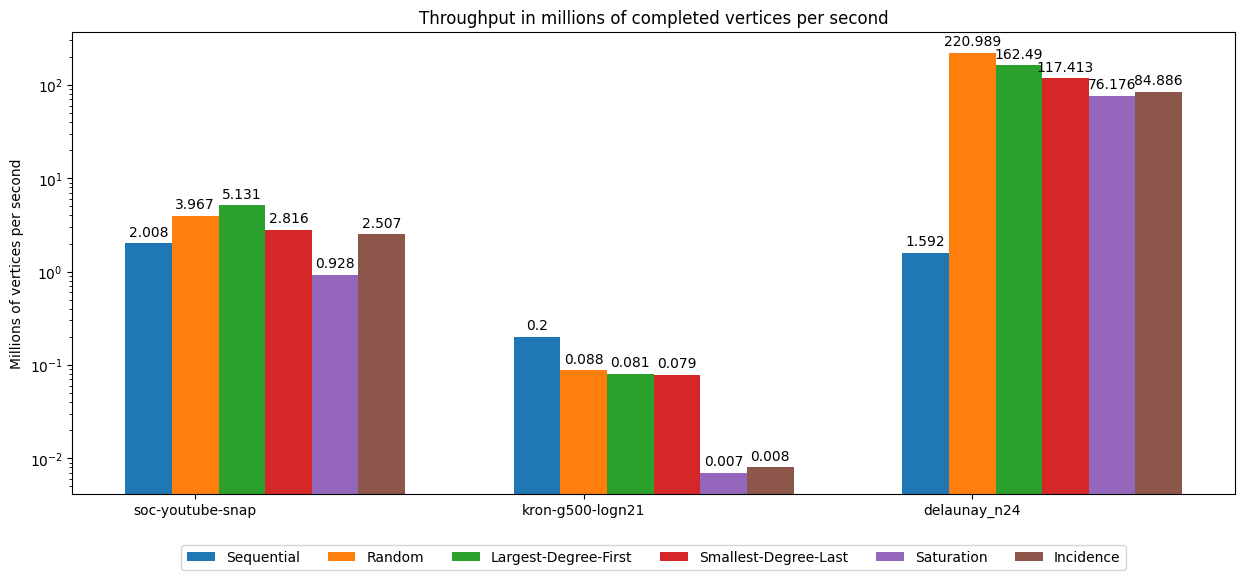

<Figure size 1500x480 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

species = ("soc-youtube-snap", "kron-g500-logn21", "delaunay_n24")
penguin_means = {
    'Sequential': (2.008, 0.200, 1.592),
    'Random': (3.967, 0.088, 220.989),
    'Largest-Degree-First': (5.131, 0.081, 162.490),
    'Smallest-Degree-Last': (2.816, 0.079, 117.413),
    'Saturation': (0.928, 0.007, 76.176),
    'Incidence': (2.507, 0.008, 84.886),
}

x = np.arange(len(species))  # the label locations
width = 0.12  # the width of the bars
multiplier = 0


fig, ax = plt.subplots(layout=None, figsize=(15, 6))
plt.figure().set_figwidth(15)

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax
ax.set_ylabel('Millions of vertices per second')
ax.set_title('Throughput in millions of completed vertices per second')
ax.set_xticks(x + width, species)
ax.legend(bbox_to_anchor =(0.5,-0.18), loc='lower center', ncols=6)
#ax.set_ylim(0, 25)
ax.set_yscale('log')



plt.show()

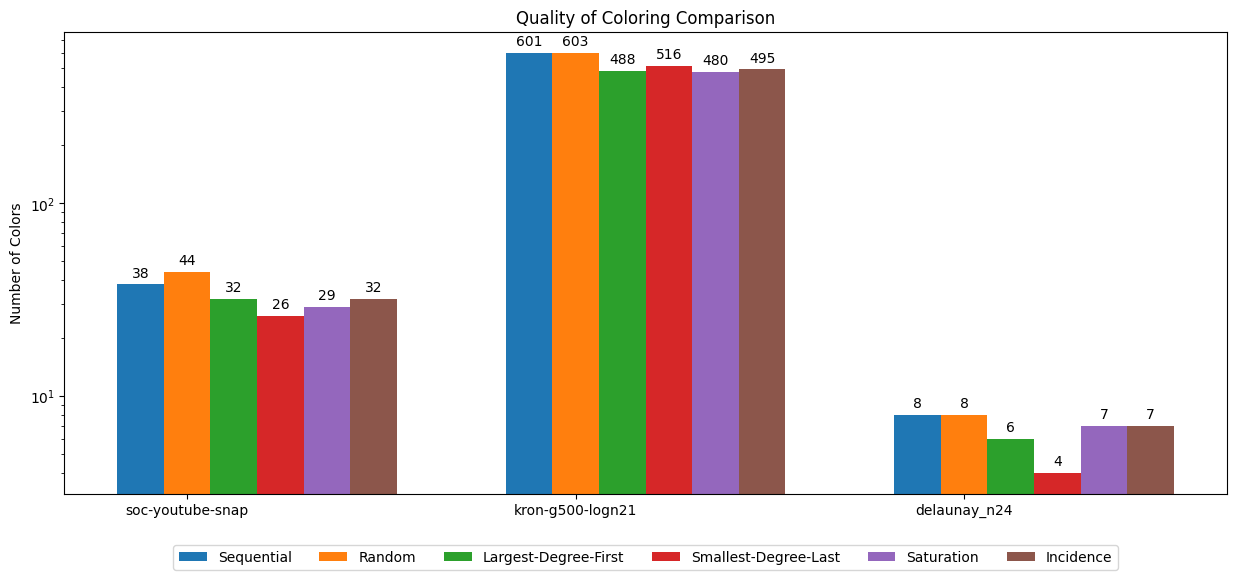

<Figure size 1500x480 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

species = ("soc-youtube-snap", "kron-g500-logn21", "delaunay_n24")
penguin_means = {
    'Sequential': (38, 601, 8),
    'Random': (44, 603, 8),
    'Largest-Degree-First': (32, 488, 6),
    'Smallest-Degree-Last': (26, 516, 4),
    'Saturation': (29, 480, 7),
    'Incidence': (32, 495, 7),
}

x = np.arange(len(species))  # the label locations
width = 0.12  # the width of the bars
multiplier = 0


fig, ax = plt.subplots(layout=None, figsize=(15, 6))
plt.figure().set_figwidth(15)

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax
ax.set_ylabel('Number of Colors')
ax.set_title('Quality of Coloring Comparison')
ax.set_xticks(x + width, species)
ax.legend(bbox_to_anchor =(0.5,-0.18), loc='lower center', ncols=6)
#ax.set_ylim(0, 25)
ax.set_yscale('log')



plt.show()